# ¿Cómo varía la cantidad de publicaciones a lo largo del año?
## ¿Cómo varía por mes?  (se podría estudiar también por estación meteorológica del año, no va a dar ningún resultado en particular pero es chamuyo) //

In [14]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
pev2 = pd.read_csv('properties/properati-AR-2017-01-01-properties-sell.csv')
pev3 = pd.read_csv('properties/properati-AR-2016-07-01-properties-sell.csv')
pev4 = pd.read_csv('properties/properati-AR-2016-03-01-properties-sell-six_months.csv')
pev5 = pd.read_csv('properties/properati-AR-2014-12-01-properties-sell.csv')
pev6 = pd.read_csv('properties/properati-AR-2013-12-01-properties-sell.csv')
pev7 = pd.read_csv('properties/properati-AR-2015-12-01-properties-sell.csv')

In [16]:
pevconc = pd.concat([pev2,pev3]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev4]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev5]).drop_duplicates().reset_index(drop=True)
pevconc = pd.concat([pevconc, pev7]).drop_duplicates().reset_index(drop=True)
pev = pd.concat([pevconc, pev6]).drop_duplicates().reset_index(drop=True)
pev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 389594 entries, 0 to 389593
Data columns (total 29 columns):
country_name                  131146 non-null object
created_on                    389594 non-null object
currency                      321983 non-null object
description                   255081 non-null object
expenses                      21657 non-null object
extra                         123943 non-null object
floor                         55013 non-null float64
geonames_id                   328381 non-null float64
id                            131146 non-null object
image_thumbnail               380067 non-null object
lat                           315425 non-null float64
lat-lon                       315425 non-null object
lon                           315420 non-null float64
operation                     389594 non-null object
place_name                    389563 non-null object
place_with_parent_names       389594 non-null object
price                         329113 no

### Le doy formato de Date a la columna created_on 

In [17]:
#Convertiremos la fecha de publicación
#Agregamos las series año y mes como columnas

#Esta función no la uso. habría que borrarla
def numero_de_mes_a_nombre(x):
    if x.month == 1: return '01 Enero'
    if x.month == 2: return '02 Febrero'
    if x.month == 3: return '03 Marzo'
    if x.month == 4: return '04 Abril'
    if x.month == 5: return '05 Mayo'
    if x.month == 6: return '06 Junio'
    if x.month == 7: return '07 Julio'
    if x.month == 8: return '08 Agosto'
    if x.month == 9: return '09 Septiembre'
    if x.month == 10: return '10 Octubre'
    if x.month == 11: return '11 Noviembre'
    if x.month == 12: return '12 Diciembre'

import calendar
pev['Date'] = pd.to_datetime(pev['created_on'])
pev['Año'] = pev['Date'].map(lambda x:x.year)
#pev['Mes'] = pev['Date'].map(numero_de_mes_a_nombre)
pev['Mes'] = pev['Date'].map(lambda x:x.month)
pev.describe()

,floor,geonames_id,lat,lon,price,price_aprox_local_currency,price_aprox_usd,price_per_m2,price_usd_per_m2,rooms,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,Año,Mes
count,5.501300e+04,3.283810e+05,315425.000000,315420.000000,3.291130e+05,3.291130e+05,3.291130e+05,1.746690e+05,2.032850e+05,238004.000000,199568.000000,86396.000000,164749.000000,389594.000000,389594.000000
mean,1.015139e+02,3.534148e+06,-34.564678,-59.033857,3.443310e+05,2.488255e+06,2.182982e+05,4.560250e+03,1.782200e+03,2.805684,178.586697,173.491226,317.719282,2014.706767,7.102235
std,2.051225e+04,3.676199e+05,4.124030,3.550506,1.128034e+06,4.417311e+06,3.559836e+05,2.575770e+04,3.885527e+03,1.457350,6344.652151,371.428621,2269.187599,1.168547,3.284267
min,0.000000e+00,3.427208e+06,-89.999744,-165.937500,0.000000e+00,0.000000e+00,0.000000e+00,5.668607e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2012.000000,1.000000
25%,2.000000e+00,3.429979e+06,-34.683370,-58.648695,9.000000e+04,7.904408e+05,8.219821e+04,1.433333e+03,9.600000e+02,2.000000,47.000000,48.000000,48.000000,2014.000000,4.000000
50%,3.000000e+00,3.432039e+06,-34.599929,-58.482069,1.600000e+05,1.408176e+06,1.337739e+05,1.977778e+03,1.621951e+03,3.000000,80.000000,78.000000,95.000000,2015.000000,7.000000
75%,6.000000e+00,3.436077e+06,-34.485307,-58.385588,3.500000e+05,2.714645e+06,2.430000e+05,2.849462e+03,2.230769e+03,4.000000,160.000000,175.000000,260.000000,2016.000000,10.000000
max,4.811040e+06,6.948895e+06,52.278850,174.375000,2.418570e+08,7.984250e+08,5.000000e+07,4.243105e+06,1.271027e+06,39.000000,987897.000000,10000.000000,200000.000000,2017.000000,12.000000


In [18]:
pev[['Date', 'Año', 'Mes']].head()

,Date,Año,Mes
0,2016-07-01,2016,7
1,2016-07-01,2016,7
2,2016-07-01,2016,7
3,2016-07-01,2016,7
4,2016-07-01,2016,7


In [19]:
cant_por_mes = pev.loc[:, ['Año', 'Mes']].groupby(['Mes']).agg([np.size])
cant_por_mes = cant_por_mes.rename(columns={'Año': 'Size'})
cant_por_mes.head(15)


,Size
,size
Mes,
1,23572
2,16001
3,41134
4,20802
5,27229
6,28895
7,40018
8,27406


In [20]:
import matplotlib.patches as mpatches

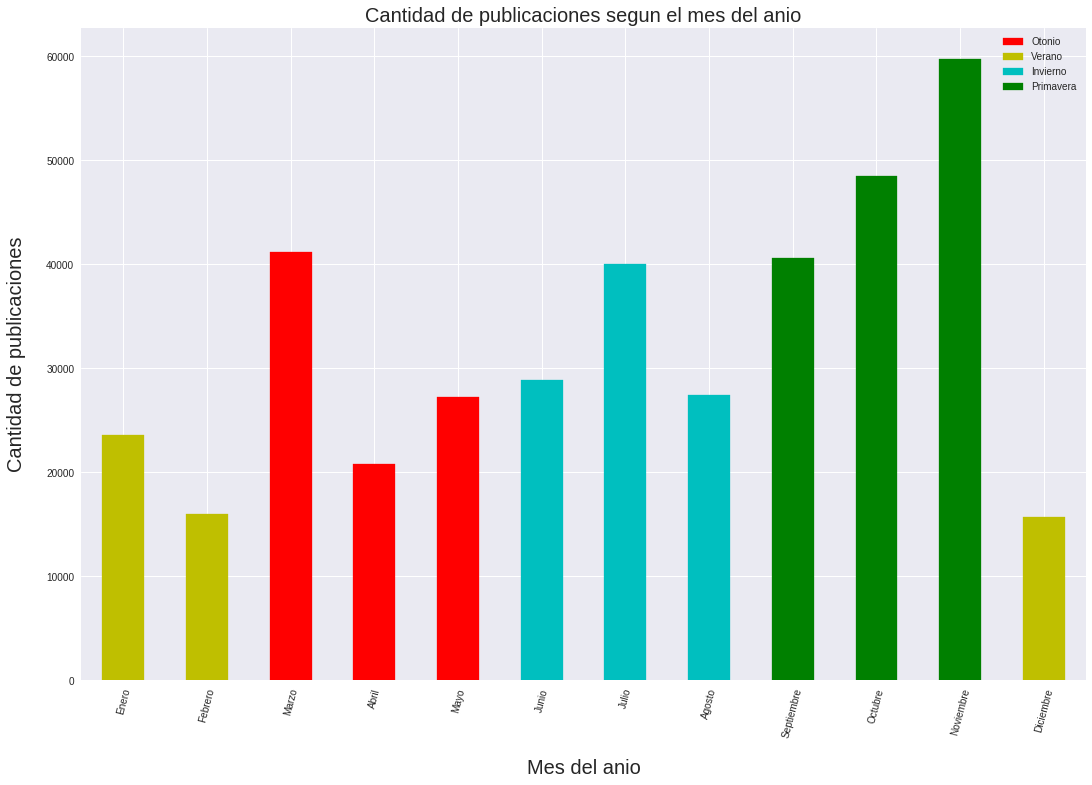

In [21]:
f= plt.figure()
ax = cant_por_mes['Size'].plot(kind='bar', rot=75, figsize=(18,12), ax=f.gca())
ax.set_ylabel('Cantidad de publicaciones',size=20.0,labelpad=20.0);
ax.set_xlabel('Mes del anio',size=20.0,labelpad=20.0);
ax.set_title('Cantidad de publicaciones segun el mes del anio',size=20.0)
#color para cada estación del año
yellow_patch = mpatches.Patch(color='y', label='Verano')
red_patch = mpatches.Patch(color='r', label='Otonio')
cyan_patch = mpatches.Patch(color='c', label='Invierno')
green_patch = mpatches.Patch(color='g', label='Primavera')
plt.legend(handles=[red_patch,yellow_patch,cyan_patch,green_patch])
#coloreo cada columna según la estación del año
ax.get_children()[0].set_color('y');ax.get_children()[1].set_color('y');ax.get_children()[2].set_color('r')
ax.get_children()[3].set_color('r');ax.get_children()[4].set_color('r');ax.get_children()[5].set_color('c')
ax.get_children()[6].set_color('c');ax.get_children()[7].set_color('c');ax.get_children()[8].set_color('g')
ax.get_children()[9].set_color('g');ax.get_children()[10].set_color('g');ax.get_children()[11].set_color('y')

ax.set_xticklabels(['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre',\
                    'Octubre','Noviembre','Diciembre'])
plt.show()


Podemos observar que en los meses de Octubre y Noviembre se da la mayor concentración de publicaciones creadas. Por otro lado, Diciembre, Febrero y Abril son los meses que se crearon menos publicaciones. Refiriéndonos a las estaciones meteorológicas del año, entonces tendremos que mencionar a la Primavera como la estación del año que tiene mayor tendencia a la publicación de inmuebles.